# Omnibus Tests and Model Comparisons
In the previous section, we saw how to use dummy variables with multiple categorical levels and then specify a subsequent regression model that fits group means and mean differeces. Although we called this a One-way ANOVA model, it probably does not look much like an ANOVA to you yet. In this section, we will complete the picture by discussing the nature of the ANOVA omnibus tests and showing how these are effectively *model comparisons*. The familiar ANOVA table is simply a way of displaying the results of several model comparisons. We will show how to generate this within `R` and also show how the values within this table relate to comparing different regression models.

... So, the core understanding here is that the ANOVA is simply a *model comparison procedure*. The ANOVA effects usually reported within an ANOVA table are really comparisons between a model that contains that effect and a model that does not contain that effect. The *variance* within the name ANOVA is a comparison between the error variances of these models. In other words, the ANOVA is asking the question "how much does the error reduce when we include this effect in the model?" The table is just a helpful way of organising all these comparisons. So we can see that the ANOVA model is in fact just a form of multiple regression, and the tests associated with the ANOVA are summaries of model comparisons. This is the true way to conceptualise an ANOVA.

In [2]:
data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')
mtcars$origin <- as.factor(mtcars$origin)

null.mod <- lm(mpg ~ 1,      data=mtcars)
full.mod <- lm(mpg ~ origin, data=mtcars)

print(anova(null.mod, full.mod))

Analysis of Variance Table

Model 1: mpg ~ 1
Model 2: mpg ~ origin
  Res.Df     RSS Df Sum of Sq      F   Pr(>F)   
1     31 1126.05                                
2     29  732.17  2    393.88 7.8003 0.001947 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [4]:
library(car)
print(Anova(full.mod))

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value   Pr(>F)   
origin    393.88  2  7.8003 0.001947 **
Residuals 732.17 29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


... Notice that this table says `Type II tests` at the top. This is something we will explore in more detail in the associated synchronous session next week.

## Follow-up Tests

## The General ANOVA Procedure
At this point, we have examined a lot of theory and output releated to ANOVA models. This can make these models look very complicated, whereas the actual procedure inside `R` is actually very simple. As shown below, we generally just follow 5 steps:

1. Convert categorical variables from strings into factors.
2. Fit and summarise the model using `lm()`.
3. Generate omnibus tests using the `Anova()` function from the `car` package.
4. Generate follow-up tests using the `emmeans` package.
5. Extract and plot the fitted values using the `effects` package.

Indeed, these same 5 steps can be followed for *every linear model you ever use*. The only differences are that steps 1, 3 and 4 are not needed when there are no categorical predictors in the model. Obviously, you also need to check assumptions, consider transformations and do all the other things we discussed last week. In addition, we have options at different stages in terms of the exact output we need. For instance, we can choose to generate NHST results from `emmeans`, or generate confidence intervals instead. However, the core of the modelling procedure exists within these 5 steps.

To see this in action, consider the following summary of the complete `mtcars` analysis


Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947

Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value   Pr(>F)   
origin    393.88  2  7.8003 0.001947 **
Residuals 732.17 29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast       estimate   SE df t.ratio p.value
 Europe - Japan    -3.75 2.62 29  -1.434  0.1624
 Europe - USA       5.67 1.94 29   2.929  0.0131
 Japan - USA    

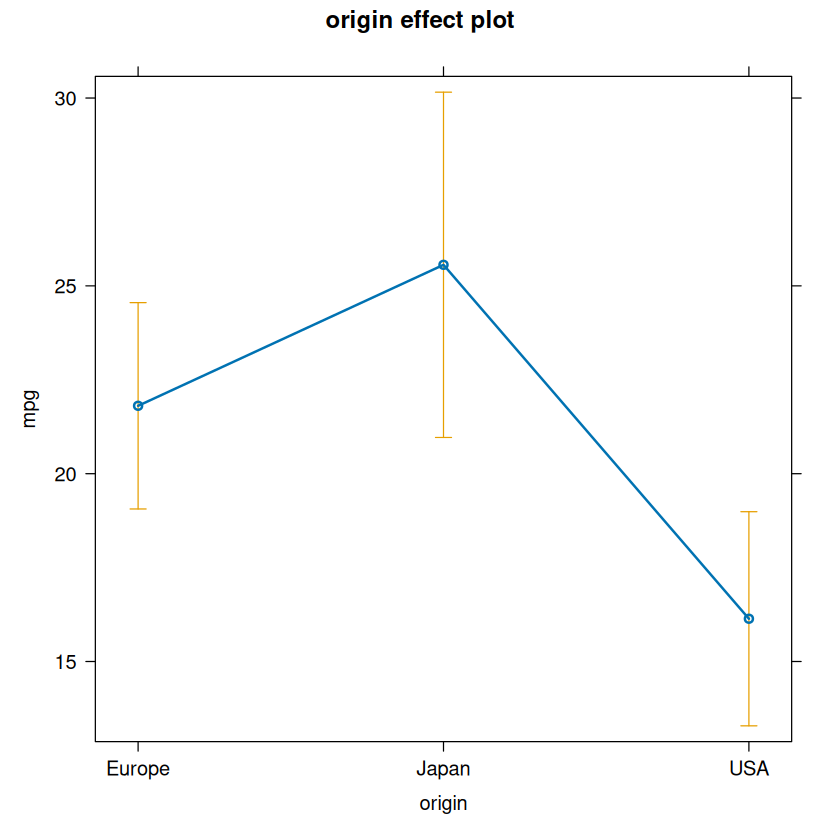

In [27]:
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model
origin.mod <- lm(mpg ~ origin, data=mtcars)
print(summary(origin.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)

# Step 5 - extract and plot effects
effs <- allEffects(origin.mod)
plot(effs)

This leads to a reasonable amount of output, but which contains everything we need to reach conclusions. Indeed, the summarising of the results of `lm()` is not strictly necessary. However, it is good practice to always look at this to make sure the model is correct, otherwise we can miss important misspecifications that will cause issues later on. It is also notable that the actual reference level of the dummy variables does not matter here, nor does even understanding the coding used for the dummy variables. These are *implementation details* that matter for understanding the theory, but should not influence the final results.